In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def annot (plot, pos):
  if pos == 'v':
    for p in plot.patches:
         plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  if pos == 'h':
     for p in plot.patches:
         plot.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),xytext=(5, 10),
         textcoords='offset points', ha="left", va="center")

In [2]:
df=pd.read_csv('./loan_data.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(381, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [8]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,False,False,False,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       30
Self_Employed        21
Loan_Amount_Term     11
Dependents            8
Gender                5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(308, 13)

Gender

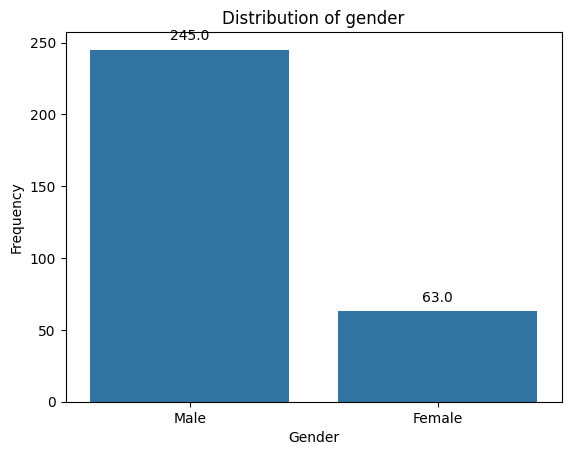

In [12]:
gender_bar=sns.countplot(x='Gender', data=df)
gender_bar.set_title('Distribution of gender')
gender_bar.set_ylabel('Frequency')
gender_bar.set_xlabel('Gender')
annot(gender_bar, 'v')

Married

Text(0, 0.5, 'Married')

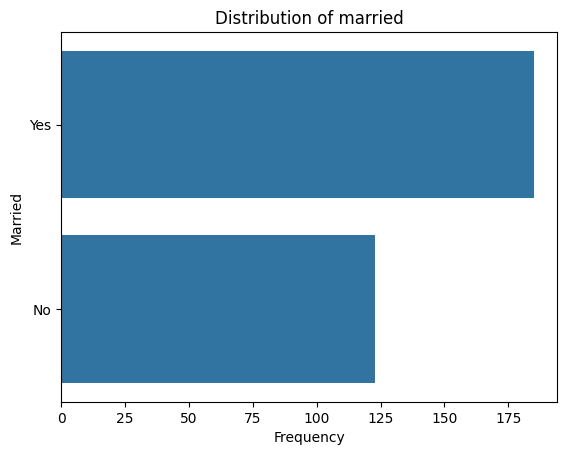

In [13]:
married_bar=sns.countplot(y='Married', data=df)
married_bar.set_title('Distribution of married')
married_bar.set_xlabel('Frequency')
married_bar.set_ylabel('Married')

Dependents

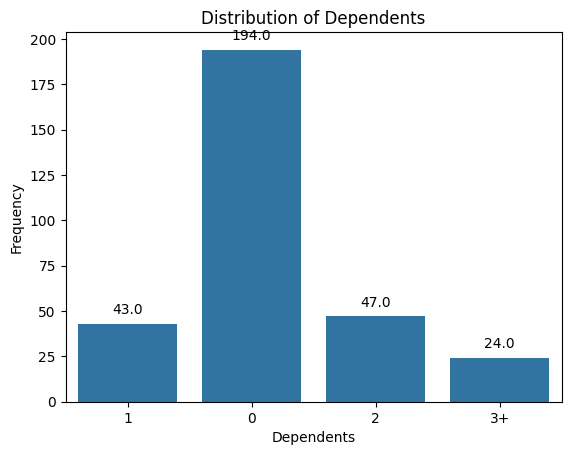

In [14]:
dependents_bar=sns.countplot(x='Dependents', data=df)
dependents_bar.set_title('Distribution of Dependents')
dependents_bar.set_ylabel('Frequency')
dependents_bar.set_xlabel('Dependents')
annot(dependents_bar, 'v')

Education

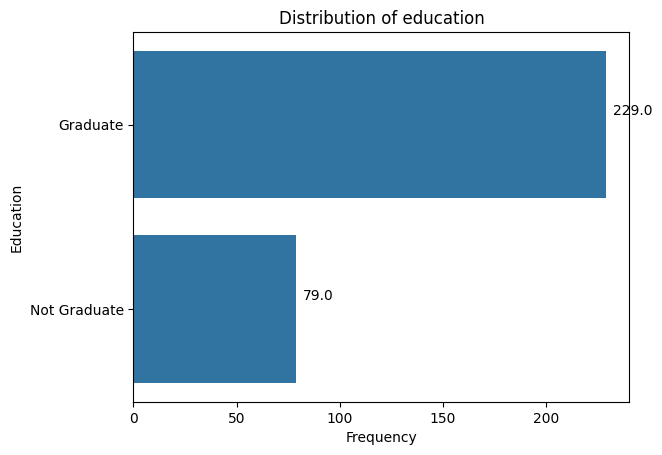

In [15]:
education_bar=sns.countplot(y='Education', data=df)
education_bar.set_title('Distribution of education')
education_bar.set_xlabel('Frequency')
education_bar.set_ylabel('Education')
annot(education_bar, 'h')

Self Employed

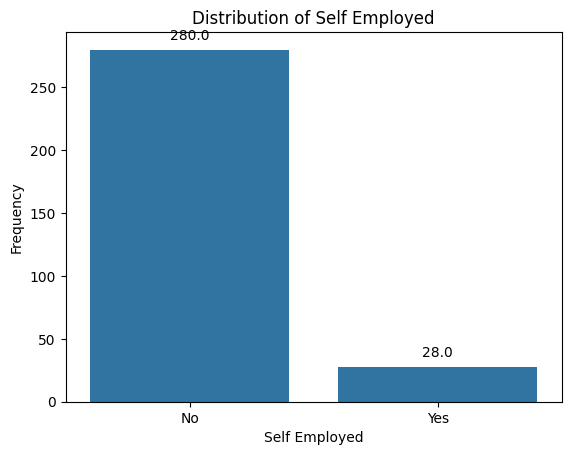

In [16]:
self_employed_bar=sns.countplot(x='Self_Employed', data=df)
self_employed_bar.set_title('Distribution of Self Employed')
self_employed_bar.set_ylabel('Frequency')
self_employed_bar.set_xlabel('Self Employed')
annot(self_employed_bar,'v')

Income 

In [17]:
df['ApplicantIncome'].describe()

count     308.000000
mean     3599.126623
std      1462.359612
min       150.000000
25%      2568.750000
50%      3329.500000
75%      4291.000000
max      9703.000000
Name: ApplicantIncome, dtype: float64

Text(0, 0.5, 'Frequency')

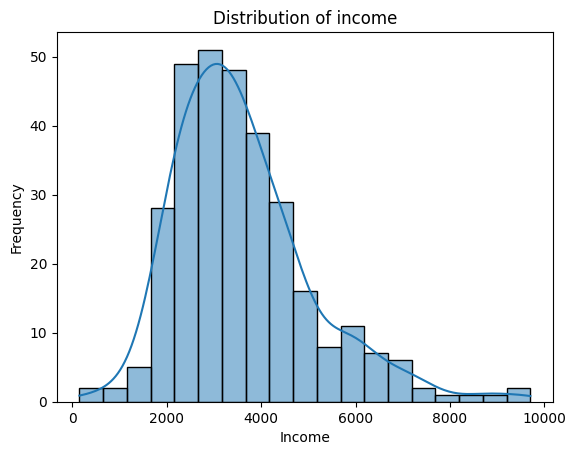

In [18]:
income_hist= sns.histplot(data=df['ApplicantIncome'], kde=True)
income_hist.set_title('Distribution of income')
income_hist.set_xlabel('Income')
income_hist.set_ylabel('Frequency') 

Text(0, 0.5, 'Income')

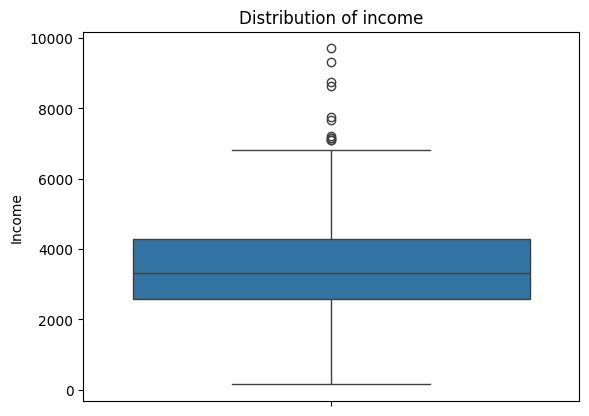

In [19]:
box_income=sns.boxplot(y='ApplicantIncome', data=df)
box_income.set_title('Distribution of income')
box_income.set_ylabel('Income')

Loan amount 

In [20]:
df['LoanAmount'].describe()

count    308.000000
mean     104.623377
std       29.382256
min        9.000000
25%       89.750000
50%      110.000000
75%      128.000000
max      150.000000
Name: LoanAmount, dtype: float64

Text(0, 0.5, 'Frequency')

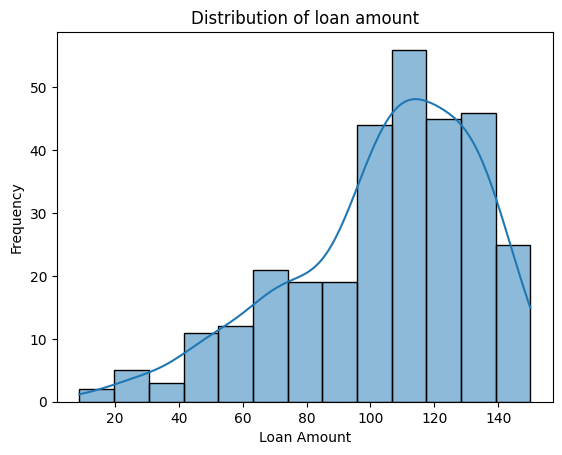

In [21]:
loan_amount_hist= sns.histplot(data=df['LoanAmount'], kde=True)
loan_amount_hist.set_title('Distribution of loan amount')
loan_amount_hist.set_xlabel('Loan Amount')
loan_amount_hist.set_ylabel('Frequency') 

Text(0.5, 1.0, 'Distribution of loan amount')

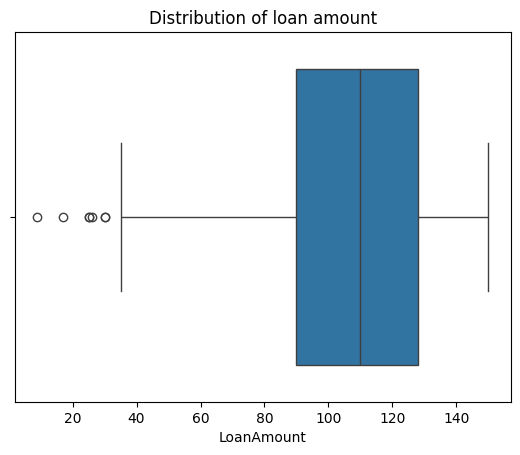

In [22]:
box_loan_amount=sns.boxplot(x='LoanAmount', data=df)
box_loan_amount.set_title('Distribution of loan amount')

Co-applicant Income

In [23]:
print('Solicitudes con co-aplicantes:',len(df[df['CoapplicantIncome']==0.0]))
print('Solicitudes sin co-aplicantes:',len(df[df['CoapplicantIncome']!=0.0]))

Solicitudes con co-aplicantes: 143
Solicitudes sin co-aplicantes: 165


In [24]:
df['CoapplicantIncome'].describe()

count      308.000000
mean      1278.434805
std       2520.961308
min          0.000000
25%          0.000000
50%        871.500000
75%       1953.500000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

Text(0, 0.5, 'Frequency')

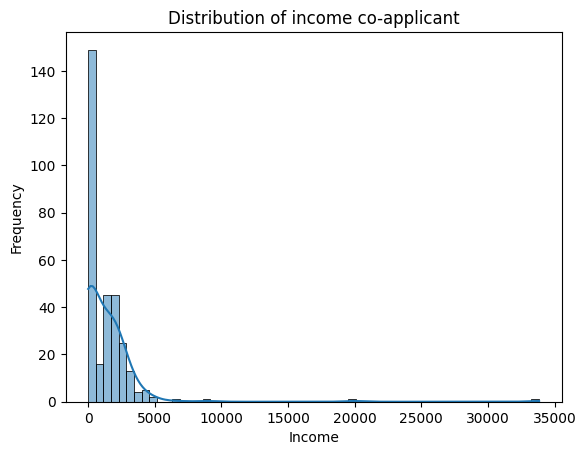

In [25]:
loan_amount_hist= sns.histplot(data=df['CoapplicantIncome'], kde=True)
loan_amount_hist.set_title('Distribution of income co-applicant')
loan_amount_hist.set_xlabel('Income')
loan_amount_hist.set_ylabel('Frequency') 

Text(0.5, 1.0, 'Distribution of co-applicant income')

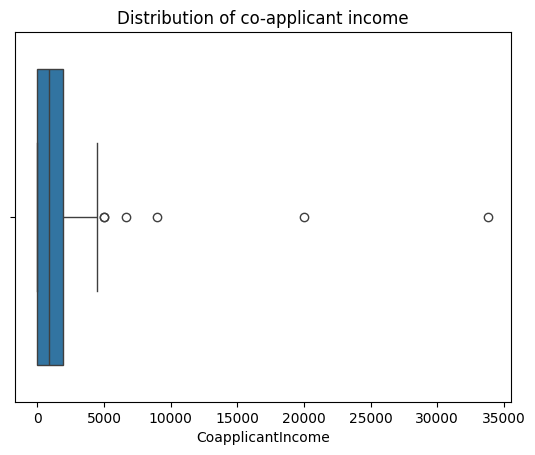

In [26]:
box_loan_amount=sns.boxplot(x='CoapplicantIncome', data=df)
box_loan_amount.set_title('Distribution of co-applicant income')

Credit history

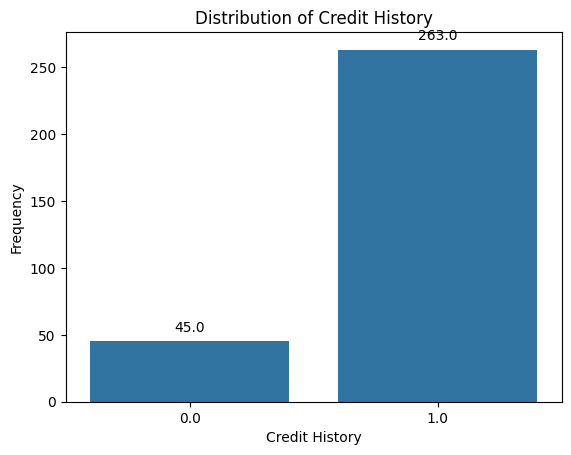

In [27]:
credit_History_bar=sns.countplot(x='Credit_History', data=df)
credit_History_bar.set_title('Distribution of Credit History')
credit_History_bar.set_ylabel('Frequency')
credit_History_bar.set_xlabel('Credit History')
annot(credit_History_bar, 'v')

Property Area

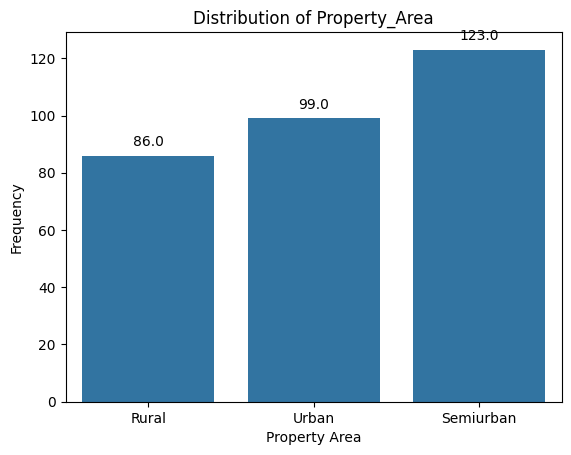

In [28]:
property_Area_bar=sns.countplot(x='Property_Area', data=df)
property_Area_bar.set_title('Distribution of Property_Area')
property_Area_bar.set_ylabel('Frequency')
property_Area_bar.set_xlabel('Property Area')
annot(property_Area_bar, 'v')

Loan status

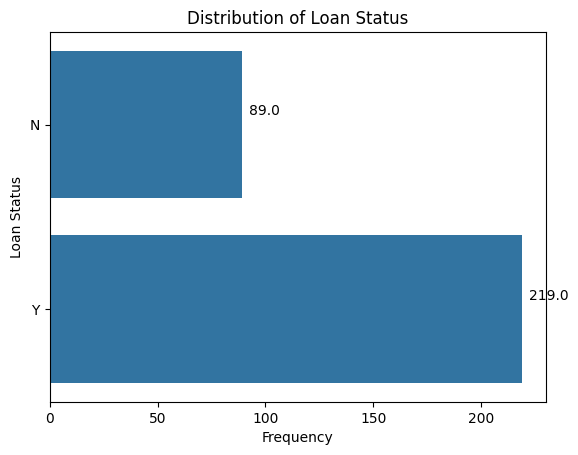

In [29]:
loan_status_bar=sns.countplot(y='Loan_Status', data=df)
loan_status_bar.set_title('Distribution of Loan Status')
loan_status_bar.set_xlabel('Frequency')
loan_status_bar.set_ylabel('Loan Status')
annot(loan_status_bar, 'h')

DATA VISUALIZATION

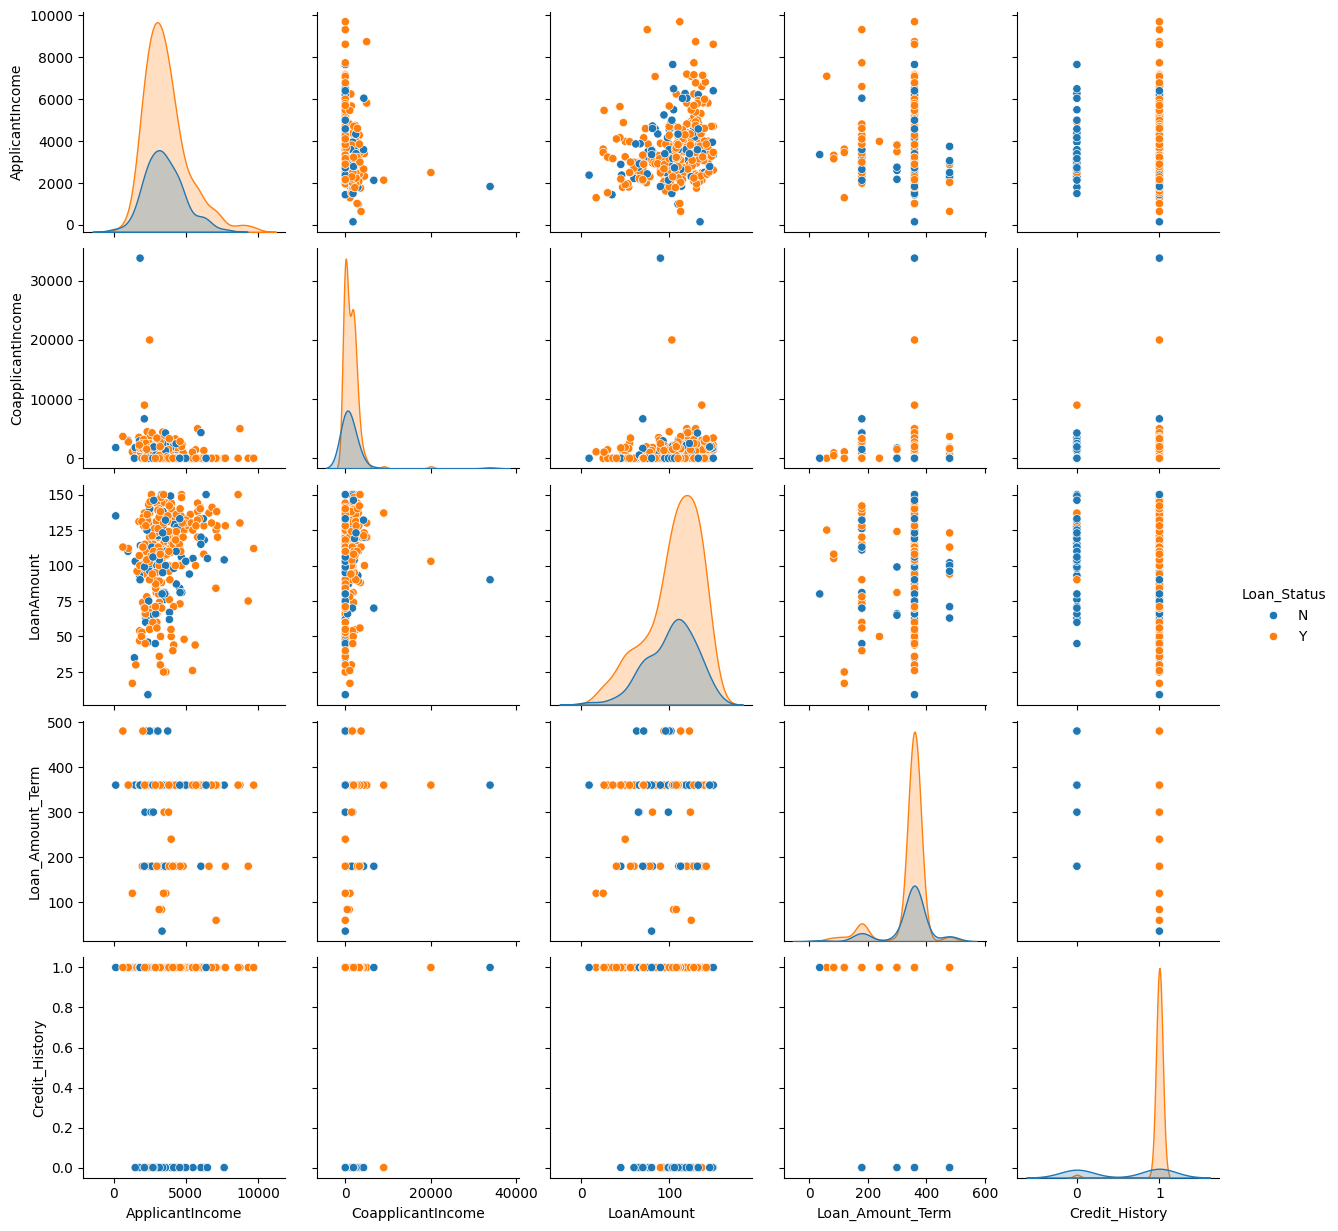

In [30]:
pair_status=sns.pairplot(df,hue ='Loan_Status')

In [31]:
loan_status_by_gender= df.groupby(['Gender'])['Loan_Status'].value_counts().reset_index() 
loan_status_by_gender['Rate']= round(loan_status_by_gender['count']/loan_status_by_gender['count'].sum(),2)
loan_status_by_gender

,Gender,Loan_Status,count,Rate
0,Female,Y,40,0.13
1,Female,N,23,0.07
2,Male,Y,179,0.58
3,Male,N,66,0.21


Text(0, 0.5, 'Frecuency')

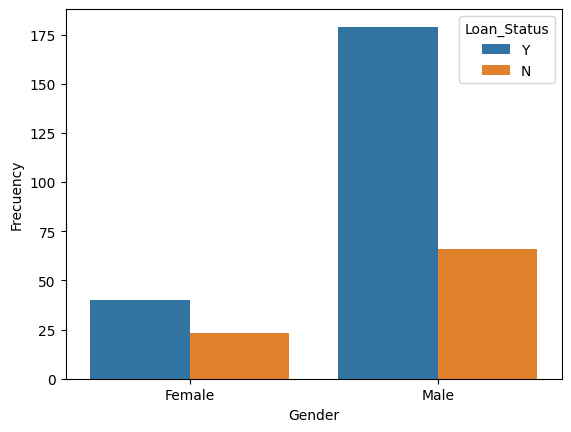

In [32]:
loan_status_by_gender_bar= sns.barplot(x='Gender', hue='Loan_Status',y='count', data=loan_status_by_gender)
loan_status_by_gender_bar.set_ylabel('Frecuency')

Text(0, 0.5, 'Gender')

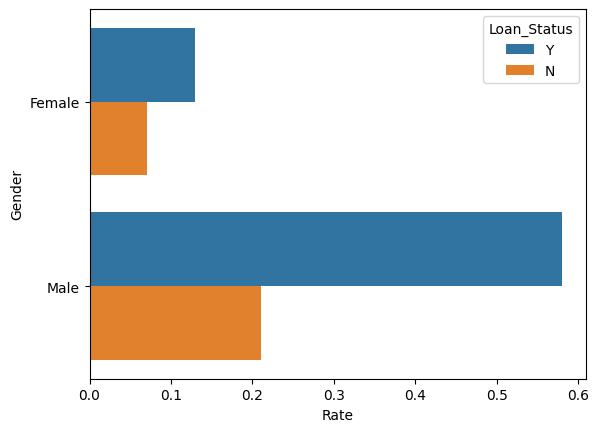

In [33]:
rate_loan_status_by_gender_bar= sns.barplot(y='Gender', hue='Loan_Status',x='Rate', data=loan_status_by_gender)
rate_loan_status_by_gender_bar.set_ylabel('Gender')

Mas del 75% de los solicitantes son del género masculino. En ambos géneros la probabilidad de aprobación del préstamo duplica a la probabilidad de rechazo.   

In [34]:
loan_status_by_married= df.groupby(['Married'])['Loan_Status'].value_counts().reset_index() 
loan_status_by_married['Rate']= round(loan_status_by_married['count']/loan_status_by_married['count'].sum(),2)
loan_status_by_married

,Married,Loan_Status,count,Rate
0,No,Y,79,0.26
1,No,N,44,0.14
2,Yes,Y,140,0.45
3,Yes,N,45,0.15


Text(0, 0.5, 'Frecuency')

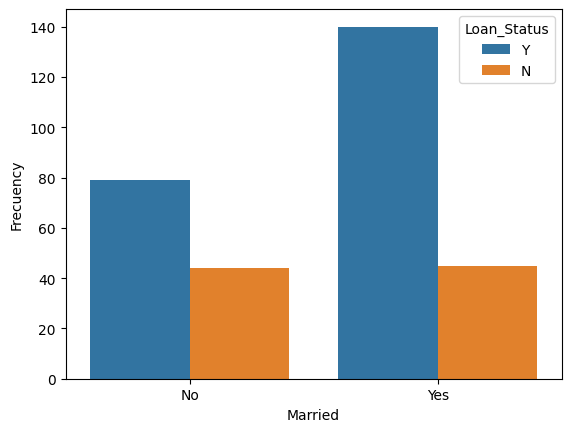

In [35]:
loan_status_by_married_bar= sns.barplot(x='Married', hue='Loan_Status',y='count', data=loan_status_by_married)
loan_status_by_married_bar.set_ylabel('Frecuency')


Poco más del 50% de los aplicantes son casados y la probabilidad de aprobación de los mismos es un 18% mayor que de los solteros.

In [36]:
education_by_loan_status=pd.crosstab(df['Education'], df['Loan_Status'])
education_by_loan_status

Loan_Status,N,Y
Education,,
Graduate,63,166
Not Graduate,26,53


Text(0.5, 23.52222222222222, 'Loan Status')

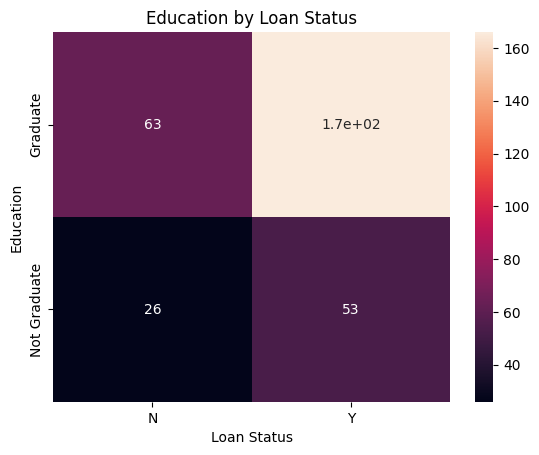

In [37]:
heat_education_by_loan_status=sns.heatmap(education_by_loan_status ,annot=True)
heat_education_by_loan_status.set_title('Education by Loan Status')
heat_education_by_loan_status.set_ylabel('Education')
heat_education_by_loan_status.set_xlabel('Loan Status')

In [38]:
self_employed_by_loan_status=pd.crosstab(df['Self_Employed'], df['Loan_Status'])
self_employed_by_loan_status

Loan_Status,N,Y
Self_Employed,,
No,79,201
Yes,10,18


Text(0.5, 23.52222222222222, 'Loan Status')

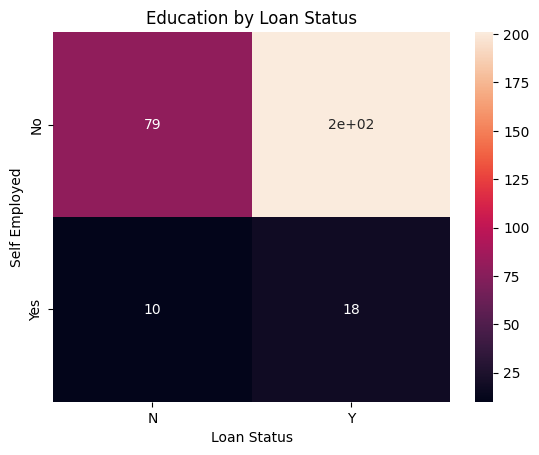

In [39]:
heat_self_employed_by_loan_status=sns.heatmap(self_employed_by_loan_status ,annot=True)
heat_self_employed_by_loan_status.set_title('Education by Loan Status')
heat_self_employed_by_loan_status.set_ylabel('Self Employed')
heat_self_employed_by_loan_status.set_xlabel('Loan Status')

El perfil vas valorado al momento de definir la aceptación del préstamo es ser graduado y estar trabajando en relación de dependencia.

[Text(0.5, 1.0, 'Dispersion of applicant income'),
 Text(0.5, 0, 'Loan Status'),
 Text(0, 0.5, 'Income')]

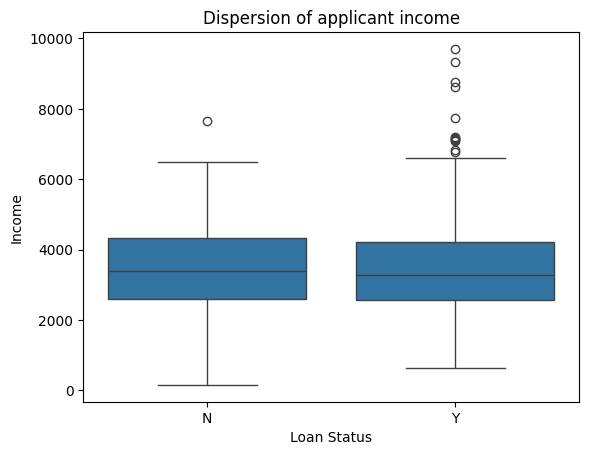

In [40]:
income_by_loan_status=sns.boxplot(y='ApplicantIncome',x="Loan_Status", data=df)
income_by_loan_status.set(title="Dispersion of applicant income",xlabel='Loan Status',ylabel='Income')

Se percibe que la dispersión del ingreso es mayor en las solicitudes que no fueron aprobadas. El promedio es ligeramente superior en la misma categoría.  

Text(0, 0.5, 'Co-applicant Income')

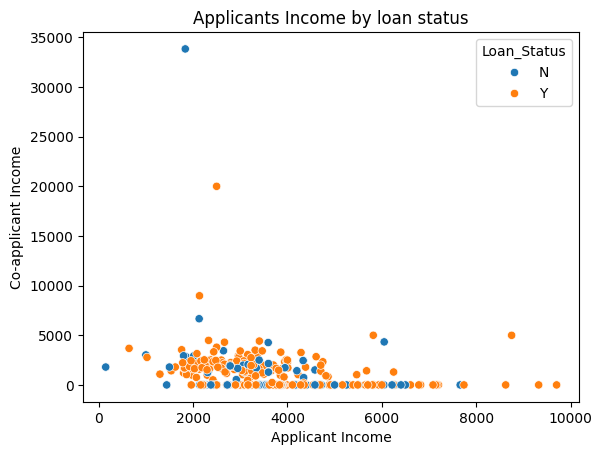

In [41]:
incomes_ampplicants_by_loan_status=sns.scatterplot(data=df, x="ApplicantIncome", y="CoapplicantIncome", hue='Loan_Status')
incomes_ampplicants_by_loan_status.set_title('Applicants Income by loan status')
incomes_ampplicants_by_loan_status.set_xlabel('Applicant Income')
incomes_ampplicants_by_loan_status.set_ylabel('Co-applicant Income')

Text(0, 0.5, 'Loan amount')

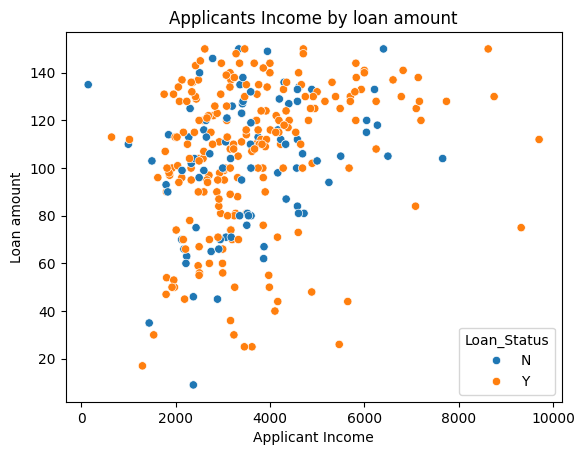

In [42]:
incomes_ampplicants_by_loan_amount=sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue='Loan_Status')
incomes_ampplicants_by_loan_amount.set_title('Applicants Income by loan amount')
incomes_ampplicants_by_loan_amount.set_xlabel('Applicant Income')
incomes_ampplicants_by_loan_amount.set_ylabel('Loan amount')

Correlation 

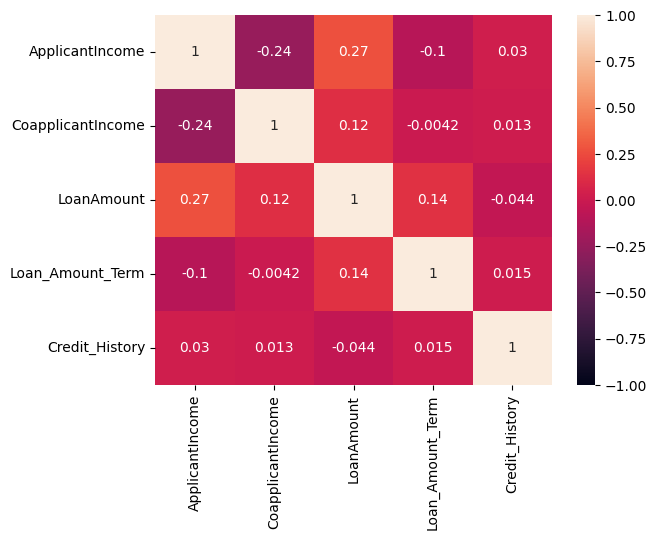

In [43]:
df_corr=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr()
corr_heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True)

Se observa una correlación negativa entre las variables de ingreso de coaplicantes y aplicantes, lo que significaría que entre mas alto es el ingreso que demuestra el aplicante menor es el del coaplicante. En cambio, entre las variables ingreso y monto del crédito la relación es positiva ya que a  medida que el ingreso sea mayor también lo será el monto solicitado.